In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [56]:
cProfile = ["cProfile_Exp5_1000","cProfile_Exp5_10000","cProfile_Exp5_100000"]

In [129]:
def retorna_df_cprofile(nome,retornar_df = True):
    dic = {}
    for file in os.listdir(os.getcwd()):
        if("DNNProv_"+nome in file):
            for file_cProfile in cProfile:
                epocas = re.findall(r'\d+',file_cProfile)[1]
                path = f"{os.getcwd()}/{file}/{file_cProfile}"
                seconds_array = []
                for file_txt in os.listdir(path):
                    if("_1" in file_txt):
                        pass
                    else:
                        #print(file,epocas,file_txt)
                        path_txt= f"{path}/{file_txt}"
                        with open(path_txt) as f:
                            for line in f:
                                if("seconds" in line):
                                    seconds = float(re.search('in (.*) seconds', line).group(1))
                                    seconds_array.append(seconds)
                                    #print(seconds_array)
                        dic[f'{nome}_{epocas}'] = seconds_array
                        
    df = pd.DataFrame(dic)
    if(retornar_df):
        return pd.DataFrame(dic)
    else:
        return (pd.DataFrame(df.loc[:, :].mean())/60).T
    

In [130]:
df_nothing = retorna_df_cprofile("nothing",False)
df_pandas = retorna_df_cprofile("pandas",False)
df_prov = retorna_df_cprofile("prov",False)

In [118]:
sns.set_theme(font_scale = 1.5)
sns.set(rc={'figure.figsize':(15,3)})

In [131]:
df_nothing.loc[0]

nothing_1000       0.495983
nothing_10000      2.405828
nothing_100000    21.663250
Name: 0, dtype: float64

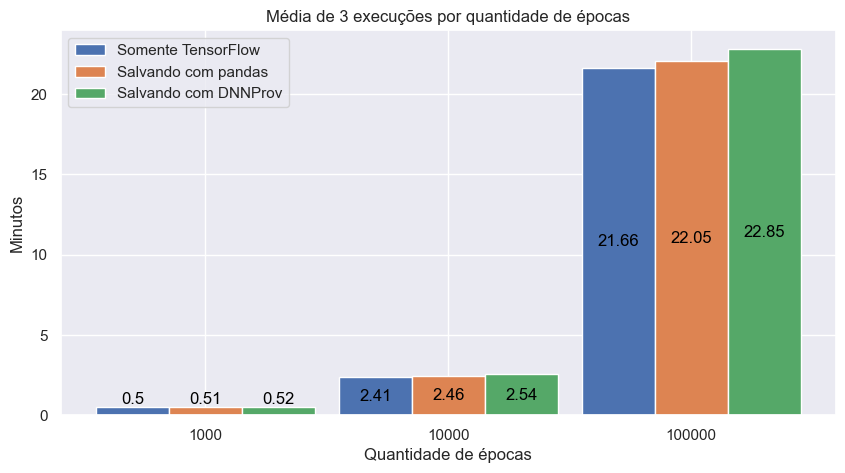

In [175]:
# Número de barras por categoria
N = 3

blue_bar = df_nothing.loc[0]
orange_bar = df_pandas.loc[0]
green_bar = df_prov.loc[0]

# Posição das barras em x
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# largura da barra
width = 0.3       

# Plot
plt.bar(ind, blue_bar , width, label='Somente TensorFlow')
for i,t in enumerate(blue_bar):
    if(t<1):
        plt.text(i+width*0,1,s=round(t,2),ha="center",va="center",c="black",fontdict={'size':12})
    else:
        plt.text(i+width*0,t/2,s=round(t,2),ha="center",va="center",c="black",fontdict={'size':12})


plt.bar(ind + width, orange_bar, width, label='Salvando com pandas')
for i,t in enumerate(orange_bar):
    if(t<1):
        plt.text(i+width*1,1,s=round(t,2),ha="center",va="center",c="black",fontdict={'size':12})
    else:
        plt.text(i+width*1,t/2,s=round(t,2),ha="center",va="center",c="black",fontdict={'size':12})

plt.bar(ind + width + width, green_bar, width, label='Salvando com DNNProv')
for i,t in enumerate(green_bar):
    if(t<1):
        plt.text(i+width*2,1,s=round(t,2),ha="center",va="center",c="black",fontdict={'size':12})
    else:
        plt.text(i+width*2,t/2,s=round(t,2),ha="center",va="center",c="black",fontdict={'size':12})

plt.xlabel('Quantidade de épocas')
plt.ylabel('Minutos')
plt.title('Média de 3 execuções por quantidade de épocas')
plt.xticks(ind + width , ('1000', '10000', '100000'))
plt.legend(loc='best')
plt.show()